In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

In [3]:
# Step 1: Load the California Housing Dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
feature_names = data.feature_names

# Display the first few rows of the dataset
print("Feature Names:", feature_names)
print(X.head())

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [4]:
# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 3: Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

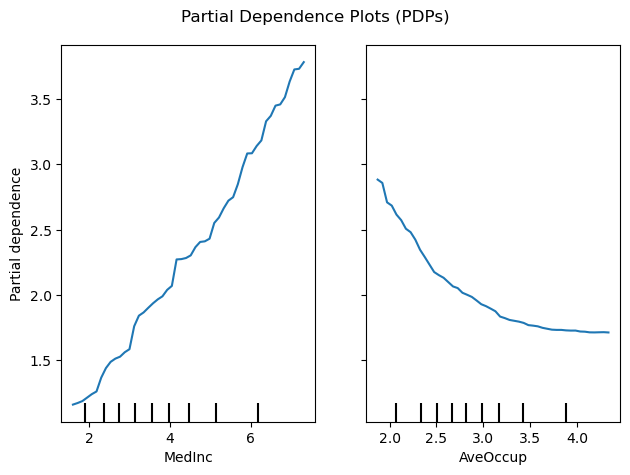

In [13]:
# Step 4: Generate PDPs for Selected Features
# Choose the features for which you want to generate PDPs
selected_features = [0, 5]  

# Generate PDPs
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    selected_features,
    feature_names=feature_names,
    grid_resolution=50,
)

# Display the plot
plt.suptitle("Partial Dependence Plots (PDPs)")
plt.tight_layout()
plt.show()

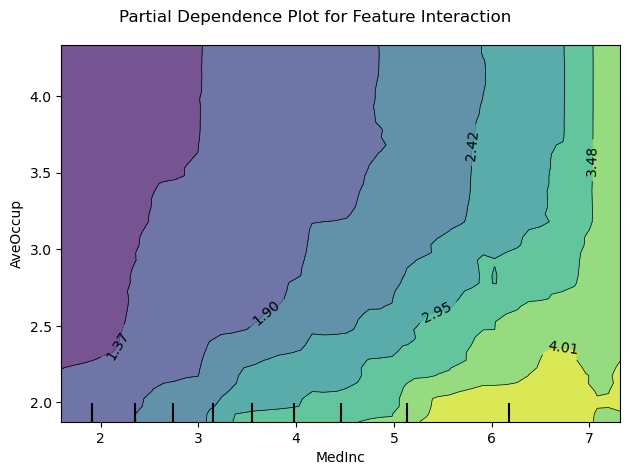

In [14]:
# Step 5: Generate PDPs for Interaction Between Two Features

selected_features = [(0, 5)]  

PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    selected_features,  # Interaction between MedianIncome and AveRooms
    feature_names=feature_names,
    grid_resolution=50,
)

# Display the plot
plt.suptitle("Partial Dependence Plot for Feature Interaction")
plt.tight_layout()
plt.show()

In [15]:
from sklearn.inspection import partial_dependence

In [27]:
X_train.shape

(16512, 8)

In [29]:
# Subset the training data (e.g., only the first 100 rows)
subset_X_train = X_train.iloc[:100]

In [30]:
feature_index = 0  # MedianIncome
feature_name = feature_names[feature_index]

# Obtain ICE data
ice_results = partial_dependence(
    model, subset_X_train, [feature_index], grid_resolution=50, kind="individual"
)

In [31]:
feature_values = ice_results["grid_values"][0]  # Grid of feature values
ice_curves = ice_results["individual"][0]  # Individual curves (ICE)

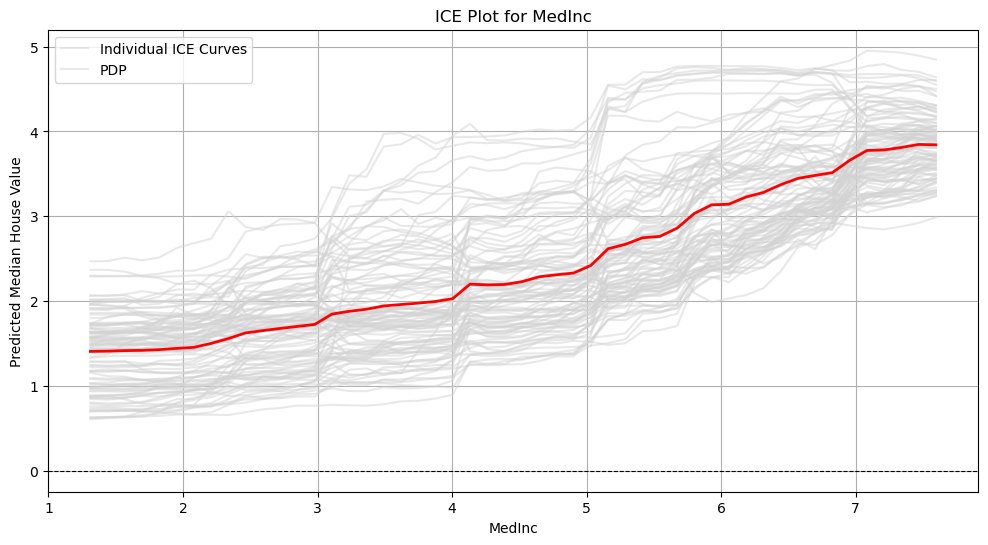

In [32]:
# Step 5: Plot ICE Curves
plt.figure(figsize=(12, 6))

# Plot individual ICE curves
for ice_curve in ice_curves:
    plt.plot(feature_values, ice_curve, color="lightgray", alpha=0.5)
    
# Highlight the average curve (PDP)
average_curve = np.mean(ice_curves, axis=0)
plt.plot(feature_values, average_curve, color="red", label="PDP", linewidth=2)

# Add labels and title
plt.title(f"ICE Plot for {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Predicted Median House Value")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend(["Individual ICE Curves", "PDP"])
plt.grid()
plt.show()

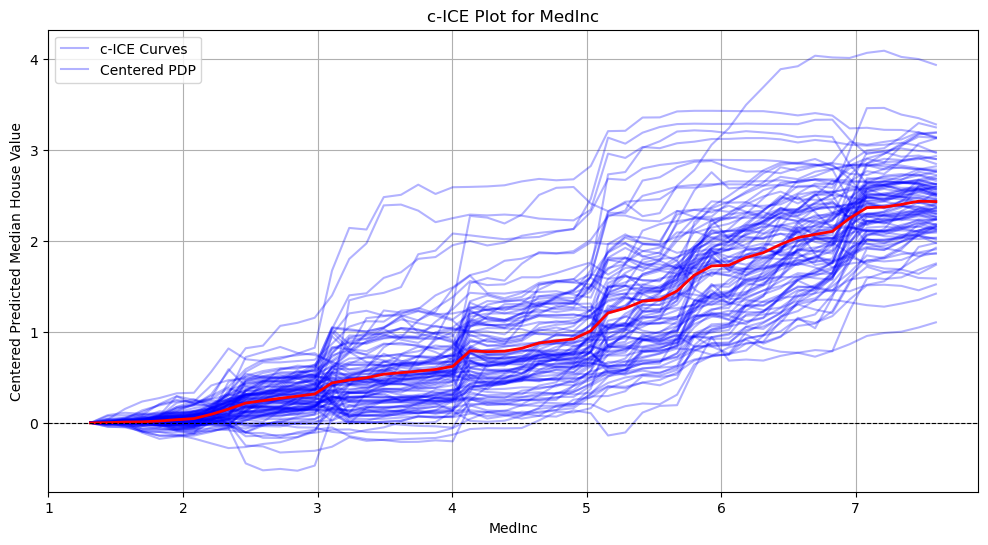

In [33]:
# Step 3: Compute c-ICE Data
# Center each ICE curve by subtracting the value of the curve at the first grid point
c_ice_curves = ice_curves - ice_curves[:, 0][:, np.newaxis]

# Step 4: Plot c-ICE Curves
plt.figure(figsize=(12, 6))

# Plot c-ICE curves
for c_ice_curve in c_ice_curves:
    plt.plot(feature_values, c_ice_curve, color="blue", alpha=0.3)

# Highlight the PDP (average curve, centered)
c_pdp_curve = np.mean(c_ice_curves, axis=0)
plt.plot(feature_values, c_pdp_curve, color="red", linewidth=2, label="Centered PDP")

# Add labels and title
plt.title(f"c-ICE Plot for {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Centered Predicted Median House Value")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend(["c-ICE Curves", "Centered PDP"])
plt.grid()
plt.show()

In [39]:
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Step 1: Load the Iris Dataset
data = load_iris(as_frame=True)
X = data.data  # Features
y = data.target  # Target
feature_names = data.feature_names

# Display the first few rows of the dataset
print("Feature Names:", feature_names)
print(X.head())

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [37]:
# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Step 3: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model accuracy on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test data: {accuracy:.2f}")

Model accuracy on test data: 1.00


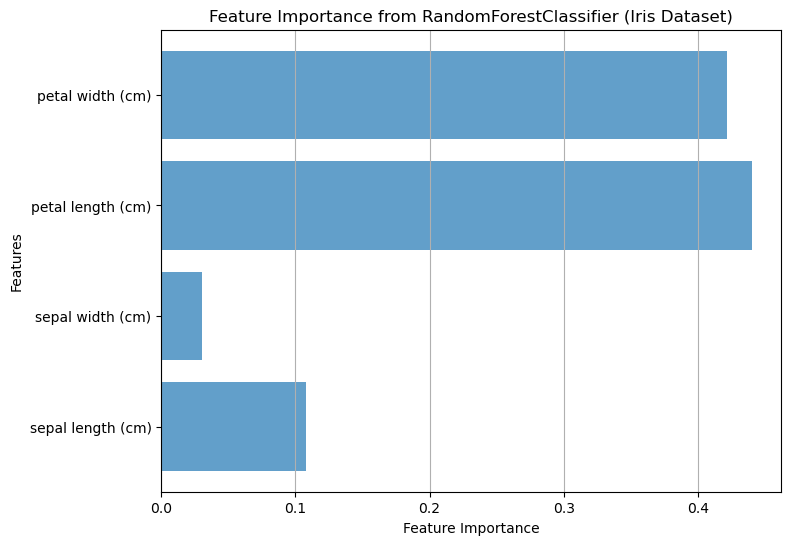

In [45]:
## Plot in-Modelling Feature Importances
# Step 4: Plot Feature Importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, model.feature_importances_, align='center', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from RandomForestClassifier (Iris Dataset)")
plt.grid(axis="x")
plt.show()


Permutation Feature Importance:
              Feature  Mean Importance   Std Dev
2  petal length (cm)             0.25  0.076376
3   petal width (cm)             0.22  0.056174
1   sepal width (cm)             0.00  0.000000
0  sepal length (cm)             0.00  0.000000


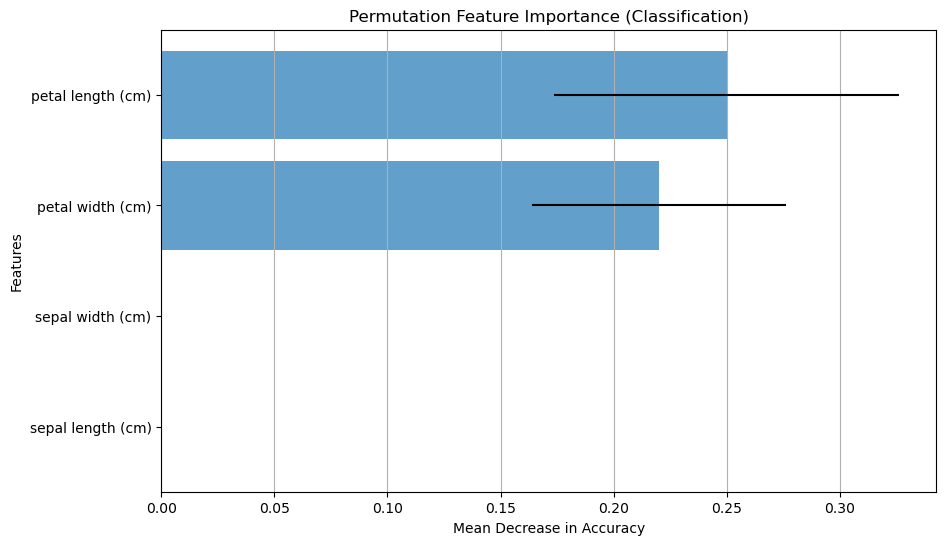

In [41]:
# Step 4: Compute Permutation Feature Importance
# Permute features on the test set to assess their importance
pfi_results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Organize results into a DataFrame
pfi_df = pd.DataFrame({
    "Feature": feature_names,
    "Mean Importance": pfi_results.importances_mean,
    "Std Dev": pfi_results.importances_std
}).sort_values(by="Mean Importance", ascending=False)

# Display feature importance
print("\nPermutation Feature Importance:\n", pfi_df)

# Step 5: Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(pfi_df["Feature"], pfi_df["Mean Importance"], xerr=pfi_df["Std Dev"], align='center', alpha=0.7)
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Features")
plt.title("Permutation Feature Importance (Classification)")
plt.gca().invert_yaxis()
plt.grid(axis="x")
plt.show()